<a href="https://colab.research.google.com/github/SidhB02/PyTorch_Tutorial/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [2]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #Input Layer(4 Features of flower) --> Hidden Layer1(some number of neurons) -->
  #Hidden Layer2 --> Output(3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1) #fc=fully connected
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = f.relu(self.out(x))
    return x

In [3]:
#Pick a manual seed for randomization
torch.manual_seed(41)
#Create an instance of our model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Replace Species with numbers

In [7]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-7-973526484>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
#Train Test Split! Set X,y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [9]:
#Convert data of X into numpy arrays
X = X.values
y= y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Train Test Split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
#Set Criterion of model to measure the error,i.e., how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr=learning rate(lower lr if error doesnt go down after bunch of iterations)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [15]:
#Train our Model!
#Epoch:-One run through all the training data in our network
epoch = 200
losses=[]
for i in range(0, epoch):
    #Go forward and get a prediction
    y_pred = model.forward(X_train)

    #Measure loss, initially high
    loss = criterion(y_pred, y_train) #Predicted Value vs y_train

    #Keep track of losses
    losses.append(loss.detach().numpy())

    #print every 10 epoch
    if i % 10 == 0:
      print(f'Epoch: {i} and Loss: {loss}')

    #Do some back propagation: take error rate of forward propagation and feed it back
    #through the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and Loss: 1.1251550912857056
Epoch: 10 and Loss: 1.1094492673873901
Epoch: 20 and Loss: 1.0956319570541382
Epoch: 30 and Loss: 1.0833038091659546
Epoch: 40 and Loss: 1.071068525314331
Epoch: 50 and Loss: 1.0581413507461548
Epoch: 60 and Loss: 1.0439516305923462
Epoch: 70 and Loss: 1.027901530265808
Epoch: 80 and Loss: 1.006042718887329
Epoch: 90 and Loss: 0.9843574166297913
Epoch: 100 and Loss: 0.9599509835243225
Epoch: 110 and Loss: 0.933077871799469
Epoch: 120 and Loss: 0.9046412110328674
Epoch: 130 and Loss: 0.8755029439926147
Epoch: 140 and Loss: 0.8462474346160889
Epoch: 150 and Loss: 0.8167484998703003
Epoch: 160 and Loss: 0.7871080636978149
Epoch: 170 and Loss: 0.7566902041435242
Epoch: 180 and Loss: 0.725196897983551
Epoch: 190 and Loss: 0.6931911706924438


Text(0.5, 0, 'epoch')

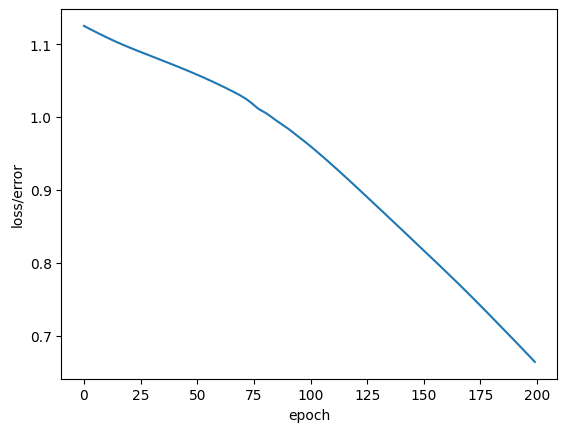

In [16]:
#Plot Graph of this
plt.plot(range(0, epoch), losses)
plt.ylabel("loss/error")
plt.xlabel('epoch')

In [17]:
#Evaluate Model on Test Data Set(validate model on test set)
with torch.no_grad():#Turn Off back propagation
   y_eval = model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
   loss = criterion(y_eval, y_test) # Find the loss of error
loss

tensor(0.6967)

In [18]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #Will tell us what class of flower our network thinks it is
    print(f"{i+1})   {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    #Correct or not
    if y_val.argmax().item()  == y_test[i]:
      correct+=1

print(f"We got {correct} correct!")

1)   tensor([0.0000, 0.9141, 1.4613]) 	 2 	 2
2)   tensor([0.0000, 0.9706, 1.9503]) 	 2 	 2
3)   tensor([0.0000, 1.0810, 2.2620]) 	 2 	 2
4)   tensor([0.0000, 0.9245, 1.0847]) 	 1 	 2
5)   tensor([0.0000, 1.0038, 1.8845]) 	 2 	 2
6)   tensor([0.0410, 0.8584, 0.8843]) 	 1 	 2
7)   tensor([0.0000, 0.9525, 1.5200]) 	 2 	 2
8)   tensor([0.0000, 0.9269, 1.0875]) 	 1 	 2
9)   tensor([0.0000, 0.9770, 1.7008]) 	 2 	 2
10)   tensor([0.0000, 1.0116, 2.1165]) 	 2 	 2
11)   tensor([0.0000, 0.9387, 1.4499]) 	 2 	 2
12)   tensor([0.9802, 0.1460, 0.0000]) 	 0 	 0
13)   tensor([0.9418, 0.1734, 0.0000]) 	 0 	 0
14)   tensor([0.2104, 0.7235, 0.5427]) 	 1 	 1
15)   tensor([0.8439, 0.2527, 0.0000]) 	 0 	 0
16)   tensor([0.0000, 0.9415, 1.3809]) 	 2 	 2
17)   tensor([0.9252, 0.1863, 0.0000]) 	 0 	 0
18)   tensor([0.0000, 0.9209, 1.4559]) 	 1 	 2
19)   tensor([0.9650, 0.1565, 0.0000]) 	 0 	 0
20)   tensor([0.8754, 0.2268, 0.0000]) 	 0 	 0
21)   tensor([0.1453, 0.7751, 0.6734]) 	 1 	 1
22)   tensor([0.0000, 

In [19]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [20]:
with torch.no_grad():
  print( model(new_iris))

tensor([0.9758, 0.1486, 0.0000])


In [21]:
#Save our NN Model
torch.save(model.state_dict(), 'first_nn_model_iris.pt')

In [22]:
#Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('first_nn_model_iris.pt'))

<All keys matched successfully>

In [23]:
#Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)